In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [176]:
data = pd.read_csv('Life Expectancy Data.csv')

In [177]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [178]:
data.shape

(2938, 22)

In [179]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [180]:
data.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
6     Afghanistan  2009  Developing              58.6            281.0   
7     Afghanistan  2008  Developing              58.1            287.0   
8     Afghanistan  2007  Developing              57.5            295.0   
9     Afghanistan  2006  Developing              57.3            295.0   
10    Afghanistan  2005  Developing              57.3            291.0   
11    Afghanistan  2004  Developing              57.0            293.0   
12    

In [181]:
status = pd.get_dummies(data.Status)
data = pd.concat([data, status], axis = 1)
data = data.drop(['Status'], axis=1)
data.rename(columns = {'Developing' : '0', 'Developed' : 1})

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,0
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [182]:
data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [183]:
data3=data

In [184]:
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [130]:
data.isna().sum()

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [131]:
data.dropna(how='any', inplace =True)

In [132]:
data.duplicated().sum()

0

In [133]:
data.isnull().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [134]:
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [169]:
data.shape

(1649, 155)

In [136]:
country = pd.get_dummies(data.Country)
data = pd.concat([data, country], axis = 1)
data = data.drop(['Country'], axis=1)

In [137]:
data.shape

(1649, 155)

In [138]:
data.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Zambia,Zimbabwe
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,...,-0.019707,-0.019707,0.003479,0.003479,-0.019707,-0.019707,0.003479,-0.019707,0.031720,-0.019707
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,...,0.054377,0.048857,-0.047665,-0.129614,0.005931,0.073116,-0.012733,0.022273,-0.107050,-0.216980
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,...,-0.113410,-0.049216,0.032306,0.067447,0.029256,-0.036723,0.011615,-0.016838,0.125818,0.231425
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,...,-0.023226,-0.003822,-0.019195,0.040572,-0.021746,-0.025341,-0.008241,-0.025817,-0.001327,-0.004510
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,...,-0.076653,-0.074021,-0.041472,0.069437,0.067462,0.038998,-0.064573,-0.088642,-0.046933,-0.001218
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,...,-0.016768,-0.023353,-0.024472,-0.032646,-0.028234,-0.001944,-0.033020,-0.021673,-0.025653,-0.036896
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,...,0.065313,0.026884,0.062463,-0.058889,-0.083912,0.056330,0.056301,-0.088404,-0.010124,-0.036499
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,...,-0.020812,0.032092,-0.019585,0.052924,0.033481,-0.021138,-0.017483,-0.020952,0.006886,-0.011783
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,...,0.044949,0.085574,-0.003463,-0.101414,0.058566,0.068205,-0.018601,0.026804,-0.083966,-0.065184
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,...,-0.023820,-0.006484,-0.019826,0.049523,-0.022487,-0.025546,-0.010563,-0.026017,0.001285,-0.001659


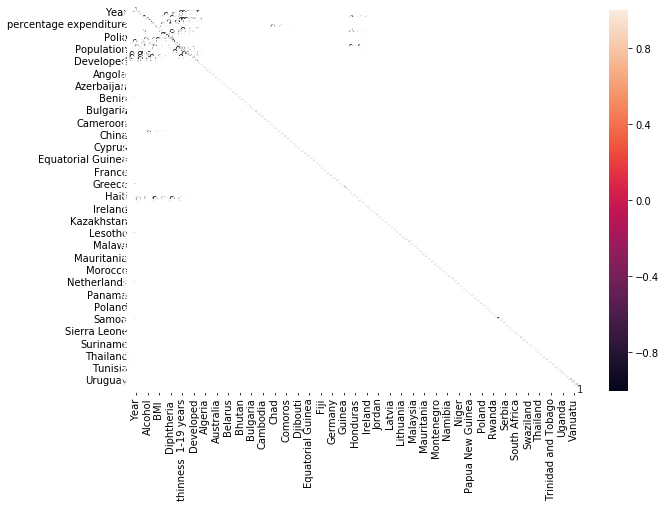

In [139]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,linewidths=2)

In [140]:
Y=data['Life expectancy ']

In [141]:
Y=Y.astype('int')

In [142]:
X=data.drop(['Life expectancy '],axis=1)

In [143]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Zambia,Zimbabwe
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,0
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,0
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,0
5,2010,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,0,0,0,0,0,0,0,0,0,0
6,2009,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,...,0,0,0,0,0,0,0,0,0,0
7,2008,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,...,0,0,0,0,0,0,0,0,0,0
8,2007,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,...,0,0,0,0,0,0,0,0,0,0
9,2006,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
from sklearn.cross_validation import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [146]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (1154, 154)
Test feature set size: (495, 154)
Training variable set size: (1154,)
Test variable set size: (495,)


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [148]:
lm = LinearRegression() 

In [149]:
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -277157.8695907626


In [151]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 2.44764109e-01 -3.77459990e-04  4.68805541e-02 -9.42697635e-02
 -1.49747586e-04  4.53054618e-03 -1.51993041e-05  3.95221049e-04
 -3.48321062e-02 -3.50201820e-03 -1.44235543e-02  1.39145980e-03
 -3.16072841e-01  1.74706540e-05 -1.98748906e-10  8.95408182e-03
  8.27021512e-02  1.07588119e+00  1.85532917e-01  2.96908149e+05
  3.00630351e+05 -2.39093072e+04 -2.38918867e+04 -2.38942268e+04
 -2.39158647e+04 -2.38926585e+04 -2.38937094e+04 -2.01636294e+04
 -2.01632708e+04 -2.38957363e+04 -2.38979658e+04 -2.38968739e+04
 -2.01634814e+04 -2.38977918e+04 -2.39086940e+04 -2.39015329e+04
 -2.38911193e+04 -2.39062872e+04 -2.38947334e+04 -2.01719439e+04
 -2.39084688e+04 -2.39099066e+04 -2.38948675e+04 -2.39017183e+04
 -2.39103221e+04 -2.38847307e+04 -2.39139221e+04 -2.39127114e+04
 -2.38880119e+04 -2.38935693e+04 -2.38938111e+04 -2.39057512e+04
 -2.38884866e+04 -2.01687026e+04 -2.01653128e+04 -2.39027864e+04
 -2.38944708e+04 -2.38923311e+04 -2.38955323e+04 -2.

In [152]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Year,2.447641e-01
Adult Mortality,-3.774600e-04
infant deaths,4.688055e-02
Alcohol,-9.426976e-02
percentage expenditure,-1.497476e-04
Hepatitis B,4.530546e-03
Measles,-1.519930e-05
BMI,3.952210e-04
under-five deaths,-3.483211e-02
Polio,-3.502018e-03


In [153]:
train_pred = lm.predict(X_train)

In [154]:
metrics.mean_squared_error(y_train,train_pred)

3.0268932824441523

In [155]:
metrics.mean_absolute_error(y_train,train_pred)

1.1150321218748944

In [156]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

1.7397969083902156

In [157]:
Y1=pd.DataFrame({'Actual': y_train,'Predicion':train_pred})

In [158]:
Y1

,Actual,Predicion
1348,69,67.759411
759,69,62.308746
2045,75,75.383478
2684,74,74.961608
913,67,65.931277
1770,53,54.472732
1731,62,62.677854
331,75,73.819159
1685,76,76.846722
2549,73,72.492926


In [159]:
xtest_pred = lm.predict(X_test)

In [160]:
metrics.mean_squared_error(y_test,xtest_pred)

2.8715935025984076

In [161]:
metrics.mean_absolute_error(y_test,xtest_pred)

1.1451648669953534

In [162]:
np.sqrt(metrics.mean_squared_error(y_test,xtest_pred))

1.6945776767674026

In [163]:
Y2=pd.DataFrame({'Actual': y_test,'Predicion':xtest_pred})

In [164]:
Y2

,Actual,Predicion
531,51,52.701427
28,72,73.483333
1673,72,72.573208
56,48,48.499975
1690,75,75.673246
2662,69,68.686859
1211,67,66.174955
2205,72,73.193370
1696,75,74.029873
157,67,69.584260


In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_train,train_pred)

In [185]:
data3.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [216]:
country = pd.get_dummies(data3.Country)
data3 = pd.concat([data3, country], axis = 1)
data3 = data3.drop(['Country'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'Country'

In [217]:
data3.dropna(how='any', inplace =True)

In [218]:
Y1=data3['Developed']

In [219]:
X1=data3.drop(['Developed'],axis=1)

In [220]:
X1

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,0,0,0,0,0,0,0,0,0,0
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,0,0,0,0,0,0,0,0,0,0
7,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,0,0,0,0,0,0,0,0,0,0
8,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,0,0,0,0,0,0,0,0,0,0
9,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,0,0,0,0,0,0,0,0,0,0


In [221]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=123)

In [222]:
clf = GaussianNB()
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

In [223]:
accuracy_score(y1_test,y1_pred, normalize = True)

0.8767676767676768

In [224]:
Y2=data3['Developing']

In [225]:
X2=data3.drop(['Developing'],axis=1)

In [226]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=123)

In [227]:
clf = GaussianNB()
clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)

In [228]:
accuracy_score(y2_test,y2_pred, normalize = True)

0.8767676767676768